In [1]:
from ema_workbench import Scenario, Policy, MultiprocessingEvaluator, ema_logging, load_results
from ema_workbench.analysis import prim
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.em_framework.evaluators import BaseEvaluator
from funs_project import get_cases, get_opti_results
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ema_workbench.analysis import parcoords
import seaborn as sns

# Optimisation

In [2]:
ACTORNAME = "Overijssel"

In [3]:
dike_model, planning_steps = get_model_for_problem_formulation(ACTORNAME)
outcomekeys = [outcome.name for outcome in dike_model.outcomes]

In [4]:
cases = get_cases(ACTORNAME)

## Reading

In [5]:
#read_results = get_opti_result(ACTORNAME)
#why was this version on top not used? It literally does the same

read_results = []

for _,case in cases.items():
    temp = pd.read_csv("simulation/optimisation/" + ACTORNAME + "/results_" + case +".csv")
    temp_ = pd.read_csv("simulation/optimisation/" + ACTORNAME + "/convergence_" + case +".csv")
    read_results.append([temp, temp_])

In [6]:
opt_df = pd.DataFrame()
for i, (result, convergence) in enumerate(read_results):
    opt_df = pd.concat([opt_df, result], axis=0)

In [7]:
policies = opt_df.iloc[:, :-3]

Step 1: Remove true duplicates 

In [8]:
policies.drop_duplicates(inplace=True)

Cluster method

In [9]:
processed_policies = policies.copy()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
scaler.fit(processed_policies)

StandardScaler()

In [12]:
scaled_features = scaler.transform(processed_policies)

In [13]:
scaled_data = pd.DataFrame(scaled_features, columns = processed_policies.columns)

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=0).fit(processed_policies)

In [15]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=processed_policies.columns)
centers

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
0,0.0,0.0,0.0,0.0,0.0,0.0,1.500000,0.000000,0.00,0.0,7.500000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.200000,0.00,0.0,4.600000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,2.500000,0.000000,0.00,0.0,1.500000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.666667,0.00,0.0,3.333333,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,3.00,0.0,9.333333,2.333333,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.250000,0.25,0.0,9.750000,0.250000,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,5.000000,0.00,0.0,1.500000,0.000000,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,8.500000,0.00,0.0,4.500000,0.000000,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,1.666667,0.00,0.0,2.666667,0.000000,0.0
9,0.5,0.5,0.5,0.0,0.0,0.0,2.500000,1.500000,0.00,0.0,10.000000,0.000000,0.0


In [16]:
from scipy.spatial import distance_matrix

x = processed_policies.values
y = centers.values

distance = distance_matrix(x, y)

# I'm not entirely sure of how to use a distance mmatrix to find the closest

pd.DataFrame(distance)
# distance

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.240370,6.633250,8.631338,9.303524,5.033223,3.051639,9.656604,9.823441,7.895146,1.118034,3.316625,5.809475,9.055385,3.162278,10.295630,9.486833,6.855655,3.741657,10.094003,6.164414
1,2.915476,4.404543,3.535534,7.498148,6.506407,5.505679,6.422616,9.027735,3.915780,5.315073,2.000000,4.555217,4.358899,5.744563,5.916080,9.000000,2.708013,6.403124,5.055250,1.000000
2,1.581139,5.531727,7.648529,8.806563,3.958114,1.145644,9.013878,9.669540,6.582806,2.500000,2.828427,5.894913,7.681146,3.605551,9.539392,10.049876,5.354126,3.000000,9.104334,5.385165
3,1.581139,5.549775,6.519202,8.673075,5.033223,3.288237,8.440972,9.669540,6.191392,2.692582,1.000000,5.172040,7.071068,3.464102,8.602325,9.486833,4.932883,4.472136,8.034647,4.000000
4,2.121320,4.604346,4.527693,7.781745,5.887841,4.670385,7.017834,9.137833,4.582576,4.387482,1.000000,4.555217,5.228129,4.898979,6.782330,9.055385,3.316625,5.656854,6.046119,2.000000
5,2.915476,6.276942,8.860023,9.428090,3.872983,0.559017,9.912114,10.124228,7.527727,3.041381,4.242641,6.837397,8.698659,4.123106,10.630146,10.723805,6.377042,2.645751,10.274023,6.708204
6,5.700877,4.123106,2.549510,6.798693,8.266398,7.766112,5.123475,8.860023,1.825742,8.558621,5.830952,6.224950,1.000000,9.000000,4.123106,9.949874,1.825742,8.426150,3.091206,3.605551
7,7.648529,6.356099,1.581139,8.034647,10.519823,10.139650,5.590170,10.074721,4.123106,10.161201,7.000000,7.123903,2.708013,10.392305,3.162278,10.295630,4.358899,10.770330,0.745356,4.000000
8,3.535534,3.405877,2.915476,6.774134,6.633250,5.814852,5.590170,8.573214,2.236068,6.422616,3.605551,4.974937,2.708013,6.928203,5.099020,9.273618,0.577350,6.633250,4.229526,2.000000
9,5.700877,5.099020,0.707107,7.431166,8.793937,8.234835,5.408327,9.354143,3.214550,8.200610,5.000000,5.722762,2.449490,8.485281,3.741657,9.486833,2.886751,8.944272,2.134375,2.000000


In [17]:
processed_policies.shape

(53, 13)

In [18]:
# Mmmm, nevermind, so the closest policy (rows) to the center (columns) is the minimum value for that column right?

selected_indexes = []

for center in range(len(distance[0])):
    policies_distances = [distance[policy][center] for policy in range(len(distance))]
    closest_value = min(policies_distances)
    closest_index = policies_distances.index(closest_value)
    selected_indexes.append(closest_index)
    
selected_indexes

[14, 19, 9, 28, 41, 5, 36, 31, 48, 0, 13, 18, 12, 16, 35, 27, 8, 44, 52, 11]

In [19]:
processed_policies.iloc[selected_indexes]
# Is this it? Did not want to change the name of the df yet but that has to be done

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
14,0,0,0,0,0,0,1,0,0,0,7,0,0
1,0,0,0,0,0,0,0,3,0,0,5,0,0
9,0,0,0,0,0,0,3,0,0,0,2,0,0
2,0,0,0,0,0,0,0,7,0,0,3,0,0
5,0,0,0,0,0,0,0,1,3,0,10,2,0
5,0,0,0,0,0,0,0,0,0,0,10,0,0
11,0,0,0,0,0,0,1,5,0,0,1,0,0
5,0,0,0,0,0,0,0,9,0,0,4,0,0
3,0,0,0,0,0,0,0,2,0,0,3,0,0
0,0,0,1,0,0,0,3,1,0,0,10,0,0


Backup method

In [20]:
processed_policies = policies.copy()

In [21]:
processed_policies.columns[7:]

Index(['A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2'],
      dtype='object')

In [22]:
processed_policies = policies.copy()
for dike_increase in processed_policies.columns[7:]:
    processed_policies[dike_increase] = pd.cut(processed_policies[dike_increase], bins=[-0.01, 0.1, 3.1,6.1,9,10.1], labels=[0,3,6,9,10])

In [23]:
processed_policies.drop_duplicates(inplace=True, ignore_index=True)

In [24]:
processed_policies.shape

(34, 13)

In [25]:
processed_policies=policies.copy()

In [26]:
processed_policies[processed_policies.iloc[:, :6].isin([1]).any(axis=1)]

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
0,0,0,1,0,0,0,3,1,0,0,10,0,0
7,1,1,0,0,0,0,2,2,0,0,10,0,0
10,0,1,0,0,0,0,0,2,1,0,10,1,0


In [27]:
processed_policies["A.4_dikesum"] = processed_policies["A.4_DikeIncrease 0"] + processed_policies["A.4_DikeIncrease 1"] + processed_policies["A.4_DikeIncrease 2"]
processed_policies["A.5_dikesum"] = processed_policies["A.5_DikeIncrease 0"] + processed_policies["A.5_DikeIncrease 1"] + processed_policies["A.5_DikeIncrease 2"]

In [28]:
for dike_increase in ["A.4_dikesum", "A.5_dikesum"]:
    processed_policies[dike_increase] = pd.cut(processed_policies[dike_increase], bins=[-0.01, 0.01, 5.1, 10.1, 15.1], labels=[0, 5, 10, 15])

In [29]:
processed_policies =processed_policies.drop_duplicates(subset=["A.4_dikesum", "A.5_dikesum"])

In [30]:
processed_policies

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,A.4_dikesum,A.5_dikesum
0,0,0,1,0,0,0,3,1,0,0,10,0,0,5,10
1,0,0,0,0,0,0,3,0,0,0,5,0,0,0,5
2,0,0,0,0,0,0,1,0,0,0,9,0,0,0,10
7,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,3,0,2,0,10,2,0,5,15
1,0,0,0,0,0,0,0,3,0,0,5,0,0,5,5
0,0,0,0,0,0,0,0,6,0,0,3,0,0,10,5
3,0,0,0,0,0,0,2,4,0,0,0,0,0,5,0


Saving processed policies, please keep format so that nothing breaks, but if you do find it reasonable to change it let me know asap so I can fix what needs fixing.

In [31]:
processed_policies.to_csv('simulation/selected_policies_' + ACTORNAME + '.csv')

In [32]:
policyoutcomes = opt_df.iloc[:, -3:]

C:\Users\joren\anaconda3\envs\MBDM\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)
C:\Users\joren\anaconda3\envs\MBDM\lib\site-packages\ema_workbench\analysis\parcoords.py:261: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)


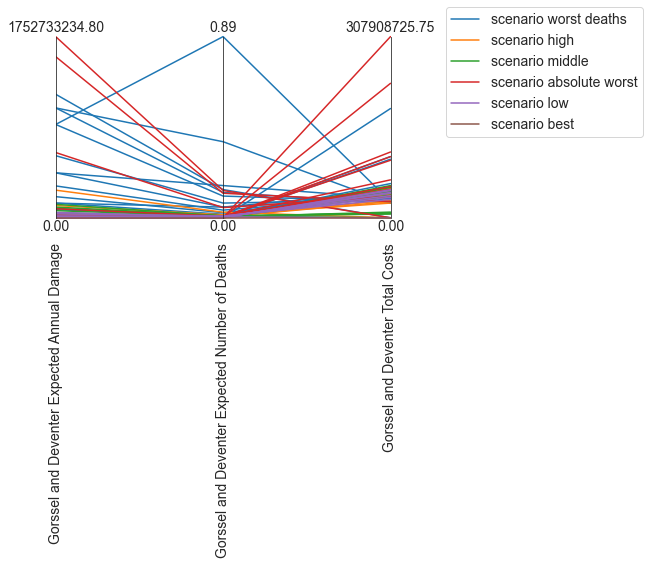

In [33]:
colors = iter(sns.color_palette())
limits = parcoords.get_limits(policyoutcomes)

# limits.loc[0, ['inertia', 'reliability']] = 1
# limits.loc[0, 'max_P'] = 4 # max over results based on quick inspection not shown here
# limits.loc[0, 'utility'] = 1 # max over results based on quick inspection not shown here
# limits.loc[1, :] = 0
paraxes = parcoords.ParallelAxes(limits)


for i, (result, _) in enumerate(read_results):
    color = next(colors)
    data = result.iloc[:,  -3:]
    paraxes.plot(data, label=f'scenario {cases[i]}', color=color)

paraxes.legend()
plt.rcParams["figure.figsize"] = (8,8)
plt.show()


# Reevaluate under deep uncertainty

## Reading

In [34]:
n_scenarios = 1000

In [35]:
du_experiments, du_outcomes = load_results("simulation/optimisation/du_scen_" + str(n_scenarios) + "_" + ACTORNAME + ".tar.gz")

## Regret
Comparing alternatives
"With a regret view, a decision maker wants to minimize the regret of choosing incorrectly, where regret is the loss in performance. This regret could be the cost of assuming the wrong future scenario or the cost of choosing the wrong alternative. In the first case, maximum regret of an alternative is the difference between its performances in the best estimate future scenario and in the scenario where it shows the worst performance, for example, as applied by Kasprzyk et al. (2013). In the second case, the regret of an alternative in a certain future scenario is the difference between its performance and the best-performing alternative, as proposed by Savage (1951). Maximum regret of an alternative is its highest regret achieved over all future scenarios. In both regret cases, the alternative with the smallest maximum regret is the most robust."

https://link.springer.com/article/10.1007/s13595-017-0641-2

In [36]:
outcomekeys = list(du_outcomes.keys())
outcomekeys

['Gorssel and Deventer Expected Annual Damage',
 'Gorssel and Deventer Expected Number of Deaths',
 'Gorssel and Deventer Total Costs']

In [37]:
DAMAGE = outcomekeys[0]
DEATHS = outcomekeys[1]
COSTS = outcomekeys[2]

Regression calculation based on assignments

In [38]:
overall_scores = {}
regret = []
for scenario in du_experiments.scenario.unique():
    logical = du_experiments.scenario==scenario
    temp_results = {k:v[logical] for k,v in du_outcomes.items()}
    temp_results = pd.DataFrame(temp_results)
    temp_experiments = du_experiments[du_experiments.scenario==scenario]
    
    best = temp_results.min()
    scenario_regret = temp_results - best
    scenario_regret['policy'] = temp_experiments.policy.values
    regret.append(scenario_regret)

In [39]:
regret = pd.concat(regret)
maxregret = regret.groupby('policy').max()

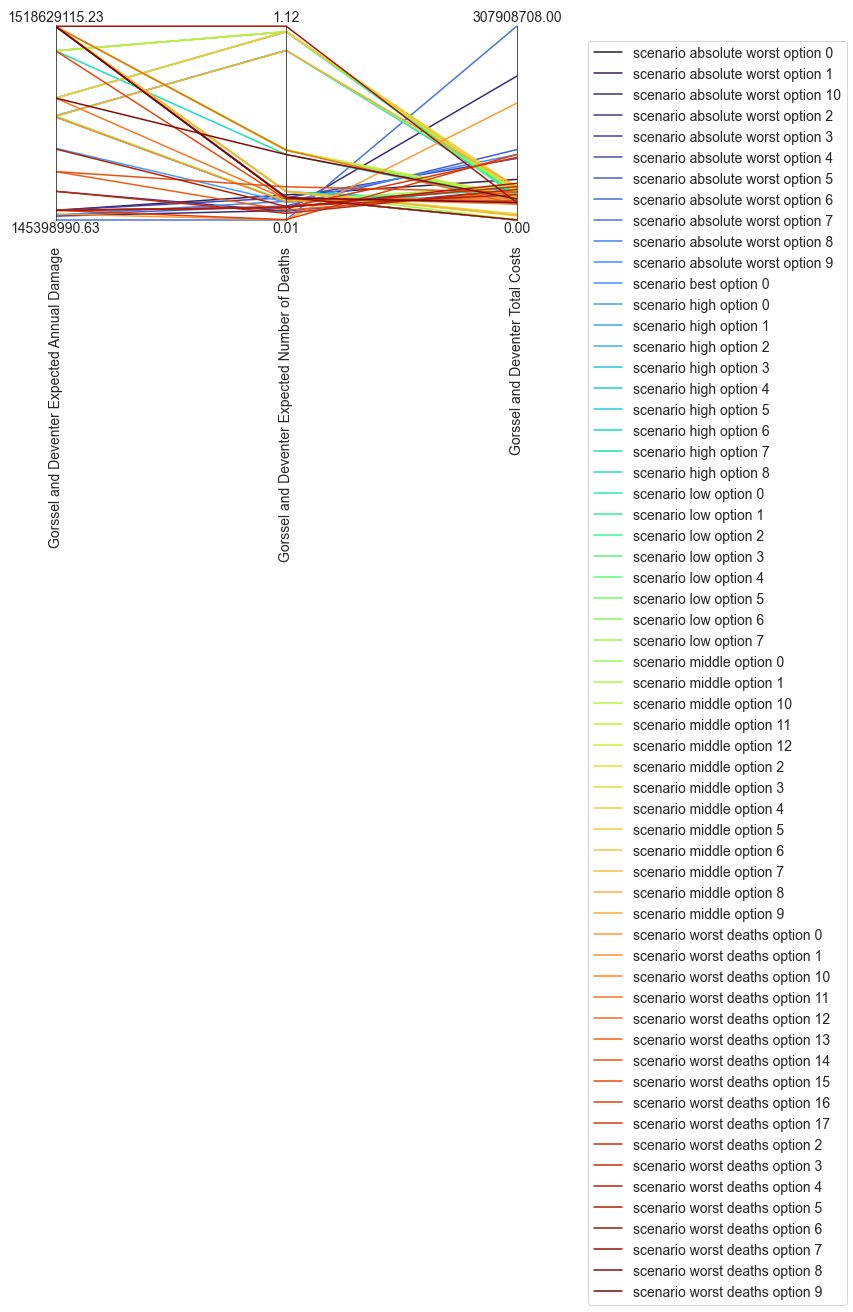

In [40]:
from matplotlib import cm

limits = parcoords.get_limits(maxregret)
paraxes = parcoords.ParallelAxes(maxregret)

cmap = cm.get_cmap('turbo', maxregret.shape[0])
i=0
for index, row in maxregret.iterrows():
    paraxes.plot(row, color=cmap.colors[i], label=index)
    i+=1
    
paraxes.legend()
plt.savefig("../../report/figures/regret_figure"+ "_" + ACTORNAME+ ".png")

plt.show()

## Satisficing
Performance threshold
"seeks a decision alternative that meets his or her performance requirements over the range of plausible future scenarios. "

For the city of Deventer, treshold values for Damage, Deaths and Costs are listed below. These values are based on ...
- Damage: 3.5e8
- Deaths: 0.05
- Costs: 16000

## These are a guestimate based on the table above, a better number is still more important

In [41]:
satisfycing_df = opt_df.copy()
satisfycing_df.drop_duplicates(inplace=True)
#satisfycing_df.iloc[:,  -3:]

In [42]:
n_overijssel = 1.16e6
# https://www.overijssel.nl/over-overijssel/cijfers-kaarten-en-onderzoek/kengetallen-provincie-overijssel/
thresholds = {'Gorssel and Deventer Expected Annual Damage': 1.53e6, 'Gorssel and Deventer Expected Number of Deaths': (1e-5*n_overijssel),
              'Gorssel and Deventer Total Costs': 1.53e7}

In [43]:
belowtresh_df = satisfycing_df.loc[(satisfycing_df['Gorssel and Deventer Expected Annual Damage'] < thresholds['Gorssel and Deventer Expected Annual Damage']) & \
                    (satisfycing_df['Gorssel and Deventer Expected Number of Deaths'] < thresholds['Gorssel and Deventer Expected Number of Deaths']) & \
                    (satisfycing_df['Gorssel and Deventer Total Costs'] < thresholds['Gorssel and Deventer Total Costs']),:].copy()
belowtresh_df.sort_index(inplace=True, ascending = False)
belowtresh_df

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Gorssel and Deventer Expected Annual Damage,Gorssel and Deventer Expected Number of Deaths,Gorssel and Deventer Total Costs
0,0,0,0,0,0,0,3,0,0,0,0,0,0,0.0,0.0,0.0


In [44]:
limits_df = belowtresh_df.iloc[:, -3:]
colors = iter(sns.color_palette())
limits = parcoords.get_limits(limits_df)

In [45]:

overall_scores = {}
for policy in du_experiments.policy.unique():
    logical = du_experiments.policy == policy
    scores = {}
    for k, v in du_outcomes.items():
        try:
            n = np.sum(v[logical]<=thresholds[k])
        except KeyError:
            continue
        scores[k] = n/1000 
    overall_scores[policy] = scores
        
overall_scores = pd.DataFrame(overall_scores).T

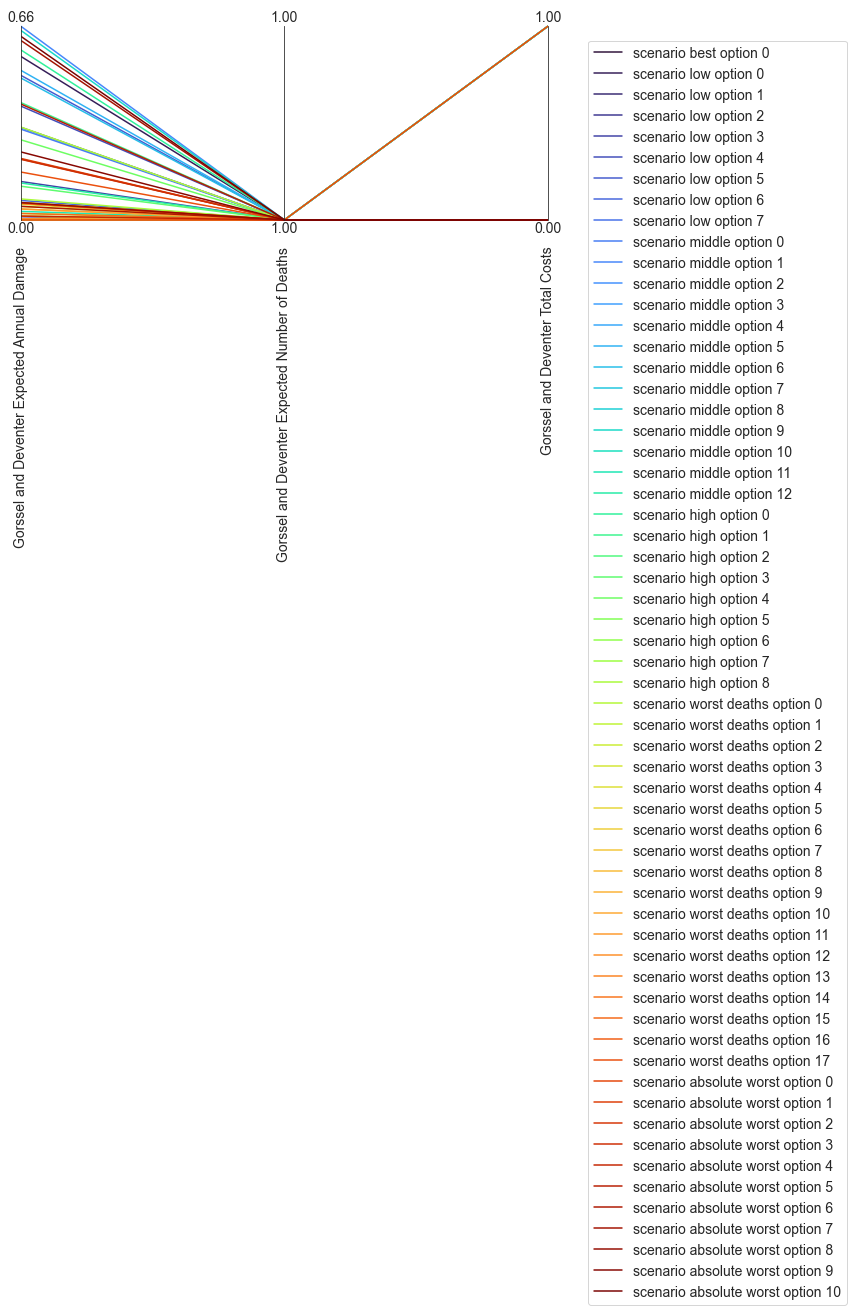

In [46]:
from matplotlib import cm

limits = parcoords.get_limits(overall_scores)
paraxes = parcoords.ParallelAxes(limits)


cmap = cm.get_cmap('turbo', overall_scores.shape[0])
i=0
for index, row in overall_scores.iterrows():
    paraxes.plot(row, color=cmap.colors[i], label=index)
    i+=1
    
paraxes.legend()
plt.savefig("../../report/figures/domain_criterion"+ "_" + ACTORNAME+ ".png")
plt.show()

In [47]:
overall_scores

,Gorssel and Deventer Expected Annual Damage,Gorssel and Deventer Expected Number of Deaths,Gorssel and Deventer Total Costs
scenario best option 0,0.001,1.0,1.0
scenario low option 0,0.554,1.0,0.0
scenario low option 1,0.314,1.0,0.0
scenario low option 2,0.012,1.0,0.0
scenario low option 3,0.131,1.0,0.0
scenario low option 4,0.386,1.0,0.0
scenario low option 5,0.490,1.0,0.0
scenario low option 6,0.067,1.0,0.0
scenario low option 7,0.001,1.0,1.0
scenario middle option 0,0.308,1.0,0.0
